# Carbonate membership functions for production rate

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
def plot_fuzzy_curve(bathy,law,label,color='g'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=4, label=label)
    lg = ax0.legend(loc=4)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Production rate [m/kyr]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

In [3]:
datafolder='../data/'

In [4]:
prod_rate = np.linspace(0.0, 4.0, num=1000, endpoint=True)

# Low production rate MBF

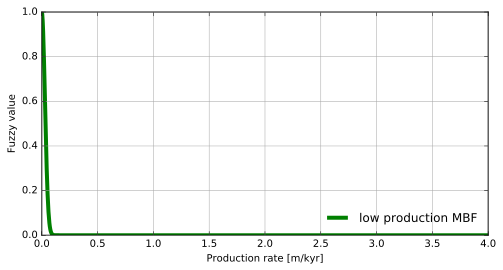

In [5]:
# Define production for shallow species
prod_sigma = 0.04
prod = fuzz.gaussmf(prod_rate, 0, prod_sigma)

# Visualise fuzzy production curves
plot_fuzzy_curve(prod_rate,prod,'low production MBF')

In [6]:
# Write membership function
nameCSV = 'mbf_low_prod'
df = pd.DataFrame({'X':prod_rate,'Y':prod})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Medium production rate MBF

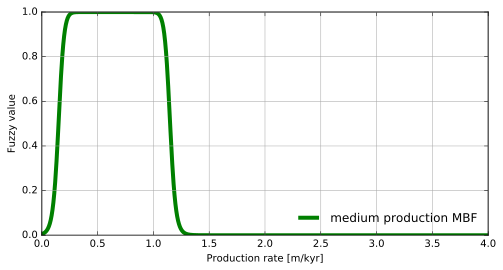

In [7]:
# Parameters
a = 0.5
b = 10
c = 0.65
prod1 = fuzz.gbellmf(prod_rate, a, b, c)

# Visualise fuzzy production curves
plot_fuzzy_curve(prod_rate,prod1,'medium production MBF')

In [8]:
# Write membership function
nameCSV = 'mbf_med_prod'
df = pd.DataFrame({'X':prod_rate,'Y':prod1})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# High production rate MBF

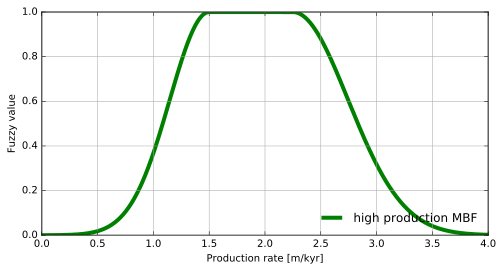

In [9]:
# Parameters
prod_sigma = 0.7
prod2 = fuzz.gaussmf(prod_rate, 2.25, prod_sigma)
prod_sigma2 = 0.5
tmp_prod = fuzz.gaussmf(prod_rate, 1.5, prod_sigma2)

id1 = np.where(prod_rate<1.5)[0]
id2 = np.where(prod_rate>2.25)[0]

prod2[id1[-1]:id2[0]] = 1.
prod2[:id1[-1]] = tmp_prod[:id1[-1]]

# Visualise fuzzy production curves
plot_fuzzy_curve(prod_rate,prod2,'high production MBF')

In [10]:
# Write membership function
nameCSV = 'mbf_high_prod'
df = pd.DataFrame({'X':prod_rate,'Y':prod2})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Very high production rate MBF

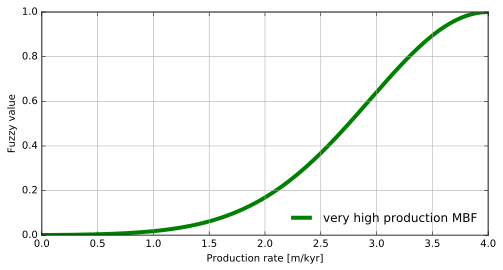

In [11]:
prod_sigma2 = 1.5
prod3 = fuzz.gaussmf(prod_rate, 4, prod_sigma2)

# Visualise fuzzy production curves
plot_fuzzy_curve(prod_rate,prod3,'very high production MBF')

In [12]:
# Write membership function
nameCSV = 'mbf_higher_prod'
df = pd.DataFrame({'X':prod_rate,'Y':prod3})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)